# Practical assigment 1: perceptrons

Watching the first lectures by prof. Mostafa, we have learnt about two types of perceptrons: classic and pocket. In this assignment you will implement in Python both types of perceptrons and test them against simulated and one real dataset.

Your notebook will be graded automatically so follow the instructions and do not change the name of the functions.

We begin importing some libraries.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.mlab

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs

# This line is necessary to show the plots.
%matplotlib inline

We are now ready to generate a dataset. We will start with a 1D Gaussian dataset, i.e., a dataset generated using a Gaussian distribution, to get used to numpy number generator and plot function.

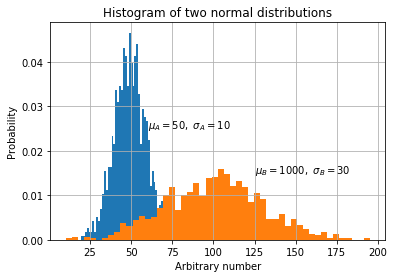

In [2]:
# Set a seed to guarantee reproducibility
np.random.seed(0)

# Set mean and standard deviation for set A
musetA = 50
sigmasetA = 10.0

# Set the number of samples
NsetA = 1000

# Generate set A (check the documentation for random.normal)
setA = np.random.normal(musetA, sigmasetA, NsetA)

# Set mean and standard deviation for set B
musetB = 100
sigmasetB = 30.0

# Set the number of samples
NsetB = 800

# Generate set B
setB = np.random.normal(musetB, sigmasetB, NsetB)

# the histogram of the data setA
nbinsA, Abins, Apatches = plt.hist(setA, normed=True, bins=50)

# the histogram of the data setB
nbinsB, Bbins, Bpatches = plt.hist(setB, normed=True, bins=50)

plt.xlabel('Arbitrary number')
plt.ylabel('Probability')
plt.title('Histogram of two normal distributions')
plt.text(60, .025, r'$\mu_A=50,\ \sigma_A=10$')
plt.text(125, .015, r'$\mu_B=1000,\ \sigma_B=30$')
plt.grid(True)
plt.show()



However, we are interested in distributions of two or more dimensions. To do that we have to set a covariance matrix first. 

We are going to start with two independent distributions.

Try to modify the parameters, mainly the covariance matrix and see what happens. Try using  equal covariances cosigmaAB = cosigmaBA != 0, then try to make them different. 

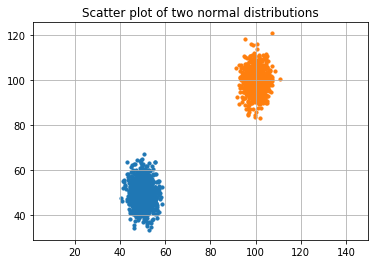

In [3]:
# Set a seed to guarantee reproducibility
np.random.seed(0)

# Set mean for set A and B
musetA = np.array([50.0,50.0])
musetB = np.array([100.0,100.0])

sigmasetA = 10.0
sigmasetB = 30.0
cosigmaAB = 0.0
cosigmaBA = 0.0

# Set covariance matrix
covAB = np.array([[ sigmasetA, cosigmaAB], 
                [cosigmaBA, sigmasetB]])

# Set the number of samples for sets A and B
NsetA = 1000
NsetB = 800

# Generate sets A and B (check the documentation for random.multivariate_normal)
setA = np.random.multivariate_normal(musetA, covAB, NsetA)
setB = np.random.multivariate_normal(musetB, covAB, NsetB)

plt.scatter(setA[:,0], setA[:,1], s=10, cmap='blue')
plt.scatter(setB[:,0], setB[:,1], s=10, cmap='orange')

plt.title('Scatter plot of two normal distributions')
plt.grid(True)
plt.axis('equal')
plt.show()

We know now how to generate 2D clouds. Now we must learn how to generate a labeled dataset. To do that, first we join the two sets of points and then we add the labels (-1 and 1 in this case).

/home/pedro/miniconda3/envs/idp3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: covariance is not positive-semidefinite.
/home/pedro/miniconda3/envs/idp3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: covariance is not positive-semidefinite.


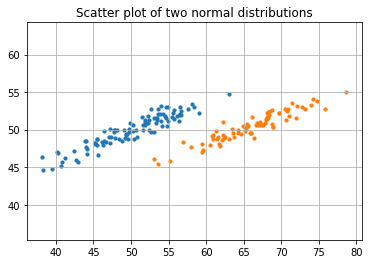

(180, 2) (180,) (180, 3)
[[ 1.         41.20911291 46.17889451]
 [ 1.         45.65279077 46.55450289]
 [ 1.         40.32541013 46.87443671]
 [ 1.         45.16903249 48.18288321]
 [ 1.         50.62835278 49.93863861]]


In [4]:
# Set a seed to guarantee reproducibility
np.random.seed(0)

# Set mean for set A and B
musetA = np.array([50.0,50.0])
musetB = np.array([65.0,50.0])

sigmasetA = 10.0
sigmasetB = 10.0
cosigmaAB = 4.5
cosigmaBA = 25.5

# Set covariance matrix
covAB = np.array([[sigmasetA, cosigmaAB], 
                [cosigmaBA, sigmasetB]])

# Set the number of samples for sets A and B
NsetA = 100
NsetB = 80

# Generate sets A and B (check the documentation for random.multivariate_normal)
setA = np.random.multivariate_normal(musetA, covAB, NsetA)
setB = np.random.multivariate_normal(musetB, covAB, NsetB)

plt.scatter(setA[:,0], setA[:,1], s=10, cmap='blue')
plt.scatter(setB[:,0], setB[:,1], s=10, cmap='orange')

plt.title('Scatter plot of two normal distributions')
plt.grid(True)
plt.axis('equal')
plt.show()

# Join the datasets A and B (check the documentation for append)
datasetAB = np.append(setA,setB,axis=0)
NsetAB = NsetA + NsetB

# Generate labels
labelsAB = np.array([-1.0]*NsetA + [1.0]*NsetB)

# Insert x_0 = 1 for all points
datasetABx0 = np.insert(datasetAB, 0, [1.0]*NsetAB, axis=1) 

# Check dataset dimensions
print(datasetAB.shape,labelsAB.shape,datasetABx0.shape)

# Check if things worked OK
print(datasetABx0[:5,])

Finally, the assignment...

You are going to implement firt the classic perceptron. To do that, use the signature definition bellow.

# Author: Pedro Augusto Sampaio Messias Ribeiro
## Nº USP: 8011914

In [26]:
def ClassicPerceptron(W,X,Y,maxiter=1000,reorder=True):
    """ClassicPerceptron function implements the most basic perceptron. 

    This algorithm starts by reordering the training samples and their labels
    if reorder is equal to True. Then, it iterates for all the samples, as many
    times as it takes, to correctly classify all the samples, or until the number 
    of iterations reaches maxiter.

    Parameters
    ----------
    W : numpy array of floats
        The initial set of weights for the perceptron classificator.
    X : numpy array of floats
        The dataset with the bias (first column is equal to 1.0).
    Y : numpy array of floats
        The labels (-1.0, ou 1.0) for each line of X.
    maxiter : integer
        The maximum number of iterations allowed before stopping.
    reorder : boolean
        reorder the training samples and their labels.

    Returns
    -------
    W : numpy array of floats
        The last set of weights for the perceptron classificator.
    niter : integer
        The current number of iterations until success, or maxiter. 
        This is just to have an idea on how many iterations it took 
        to converge.

    """

    # Sets the random seed to guarantee reproducibility.
    np.random.seed(34191)
    
    ### BEGIN SOLUTION
    w1=W
    e_in=np.zeros(0)
    change=True
    j=0
    for j in range(maxiter):
        if change==False:
            break
        y_prime=np.sign(np.matmul(X,W))
        e_in=np.append(e_in,np.mean(np.abs(y_prime-Y)))
        for i in range(len(Y)):
            if y_prime[i]!=Y[i]:
                w1=w1+Y[i]*X[i]
                change=True
                break
            else:
                change=False
        #print(j,change,w,y_prime,y)
    return [w1,j]
    ### END SOLUTION

No you are going to implement the pocket perceptron. To do that, use the signature definition bellow.

In [44]:
def PocketPerceptron(W,X,Y,maxiter=1000):
    """PocketPerceptron function implements the pocket perceptron. 

    This algorithm starts by checking if all training samples are correctly classified.
    If some are not, choose one sample not correctly classified and adjust W. Then it 
    will repeat the above procedure until all samples are correctly classified, or until 
    the number of iterations reaches maxiter.

    Parameters
    ----------
    W : numpy array of floats
        The initial set of weights for the perceptron classificator.
    X : numpy array of floats
        The dataset with the bias (first column is equal to 1.0).
    Y : numpy array of floats
        The labels (-1.0, ou 1.0) for each line of X.
    maxiter : integer
        The maximum number of iterations allowed before stopping.

    Returns
    -------
    W : numpy array of floats
        The last set of weights for the perceptron classificator.
    niter : integer
        The current number of iterations until success, or maxiter. 
        This is just to have an idea on how many iterations it took 
        to converge.

    """

    # Sets the random seed to guarantee reproducibility.
    np.random.seed(34191)
    
    ### BEGIN SOLUTION
    w1=W
    e_in=np.zeros(0) #compute in-sample error
    e_in_pocket=np.inf
    change=True
    for j in range(maxiter): #compute until stop criteria or convergence, whatever happens first
        if change==False:
            break #detecting convergence, if possible
        y_prime=np.sign(np.matmul(X,W))
        e_in_now=np.mean(np.abs(y_prime-Y))
        e_in=np.append(e_in,e_in_pocket)
        if e_in_now<e_in_pocket:
            e_in_pocket=e_in_now
            w_pocket=w1 #putting w in my "pocket"
        for i in range(len(Y)):
            if y_prime[i]!=Y[i]:
                w1=w1+Y[i]*X[i]
                change=True #has not converged
                break
            else:
                change=False
        #print(j,change,w,y_prime,y,e_in)
    return [w_pocket,j]
    ### END SOLUTION

In [58]:
classic=ClassicPerceptron(W=np.transpose(np.random.rand(datasetABx0.shape[1])),X=datasetABx0,Y=labelsAB)

In [59]:
classic

[array([  -999.09401339, -41208.55745766, -46178.5880203 ]), 999]

In [60]:
pocket=PocketPerceptron(W=np.transpose(np.random.rand(datasetABx0.shape[1])),X=datasetABx0,Y=labelsAB)

In [61]:
pocket

[array([0.90598661, 0.55545395, 0.30649378]), 999]